# POLS 203 Social Statistics
## Ninth Discussion Session
January 14, 2021

# Human Development and Education Relation

Is there a relationship betwween a district's(ilçe) human development and education levels? Let's see. First, load required libraries and the data.

In [98]:
library(ggplot2)

In [99]:
districts <- read.csv("hdi_district.csv", header = T, stringsAsFactors=FALSE, sep=";")
head(districts)
str(districts)

province,district,gov_trans,social_inclusion,economic_status,education,health,social_life,munenvperf_trans,hdi_d
İstanbul,Beşiktaş,0.944,0.685,0.867,0.981,0.732,0.900,0.775,0.864
İstanbul,Kadiköy,0.950,0.610,0.745,0.955,0.896,0.888,0.650,0.846
Ankara,Çankaya,0.962,0.355,0.634,0.965,0.745,0.775,0.700,0.766
İstanbul,Şişli,0.957,0.430,0.616,0.753,0.796,0.675,0.950,0.736
Bursa,Nilüfer,0.832,0.453,0.610,0.820,0.735,0.575,0.725,0.698
Antalya,Muratpaşa,0.913,0.377,0.602,0.765,0.800,0.575,0.550,0.692


'data.frame':	161 obs. of  10 variables:
 $ province        : chr  "İstanbul" "İstanbul" "Ankara" "İstanbul" ...
 $ district        : chr  "Beşiktaş" "Kadiköy" "Çankaya" "Şişli" ...
 $ gov_trans       : num  0.944 0.95 0.962 0.957 0.832 0.913 0.908 0.873 0.852 0.943 ...
 $ social_inclusion: num  0.685 0.61 0.355 0.43 0.453 0.377 0.235 0.537 0.258 0.433 ...
 $ economic_status : num  0.867 0.745 0.634 0.616 0.61 0.602 0.622 0.566 0.789 0.611 ...
 $ education       : num  0.981 0.955 0.965 0.753 0.82 0.765 0.882 0.631 0.881 0.736 ...
 $ health          : num  0.732 0.896 0.745 0.796 0.735 0.8 0.663 0.74 0.552 0.75 ...
 $ social_life     : num  0.9 0.888 0.775 0.675 0.575 0.575 0.688 0.688 0.575 0.225 ...
 $ munenvperf_trans: num  0.775 0.65 0.7 0.95 0.725 0.55 0.525 0.675 0.6 0.725 ...
 $ hdi_d           : num  0.864 0.846 0.766 0.736 0.698 0.692 0.692 0.681 0.681 0.669 ...


One of the conditions for linear regression is that normality assumption. Let's see if **hdi_d** variable has it.

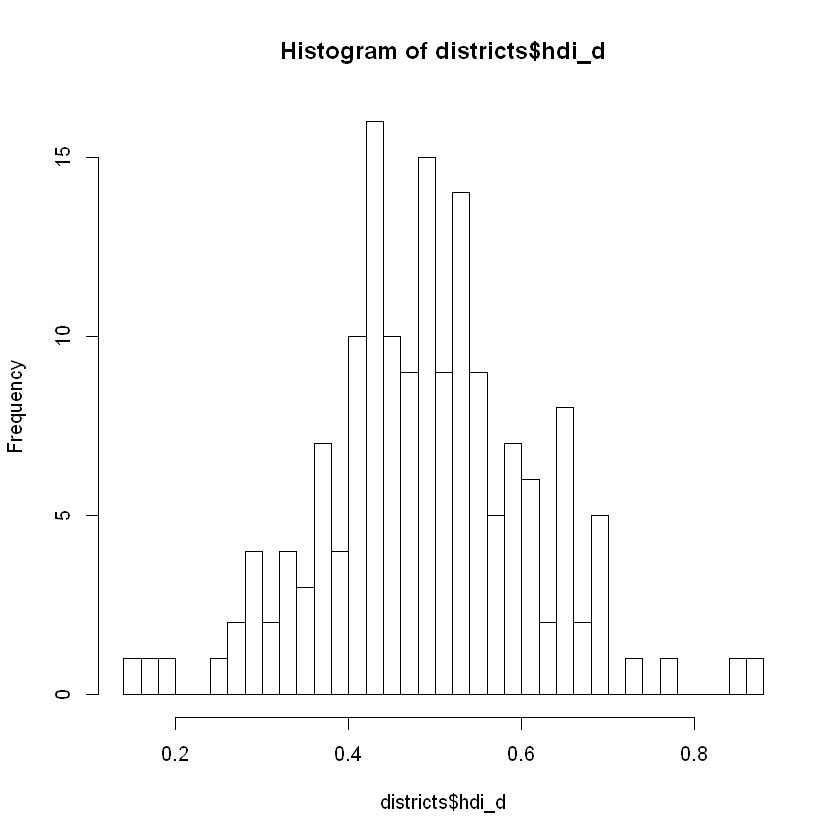

In [112]:

hist(districts$hdi_d, breaks=50)

Looks pretty normal. Let's plot **education** and **hdi_d** to see if they have linear relationship. 

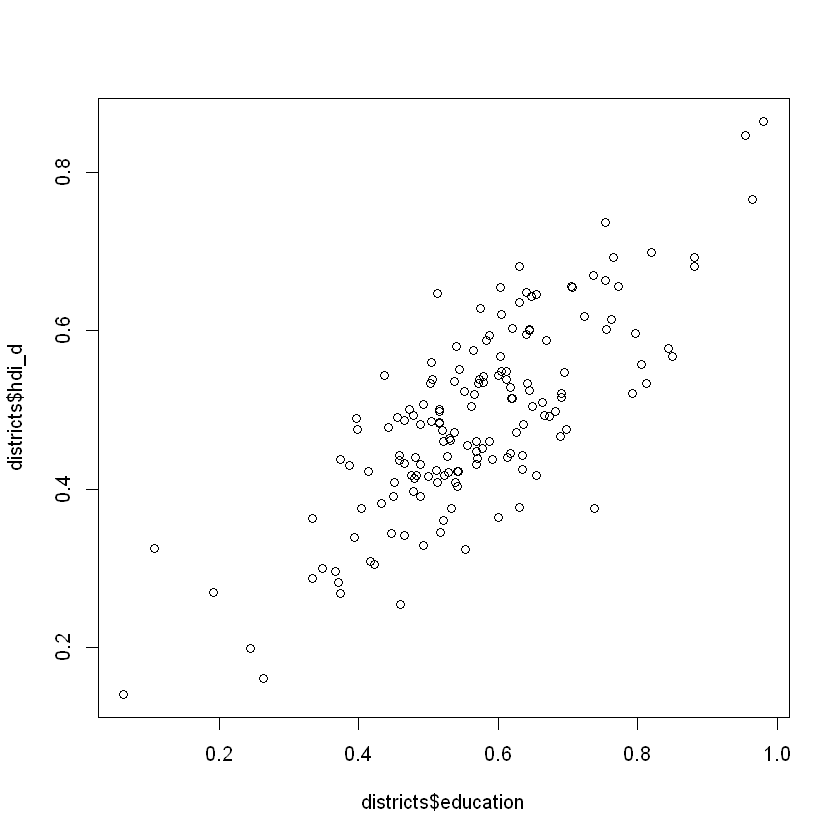

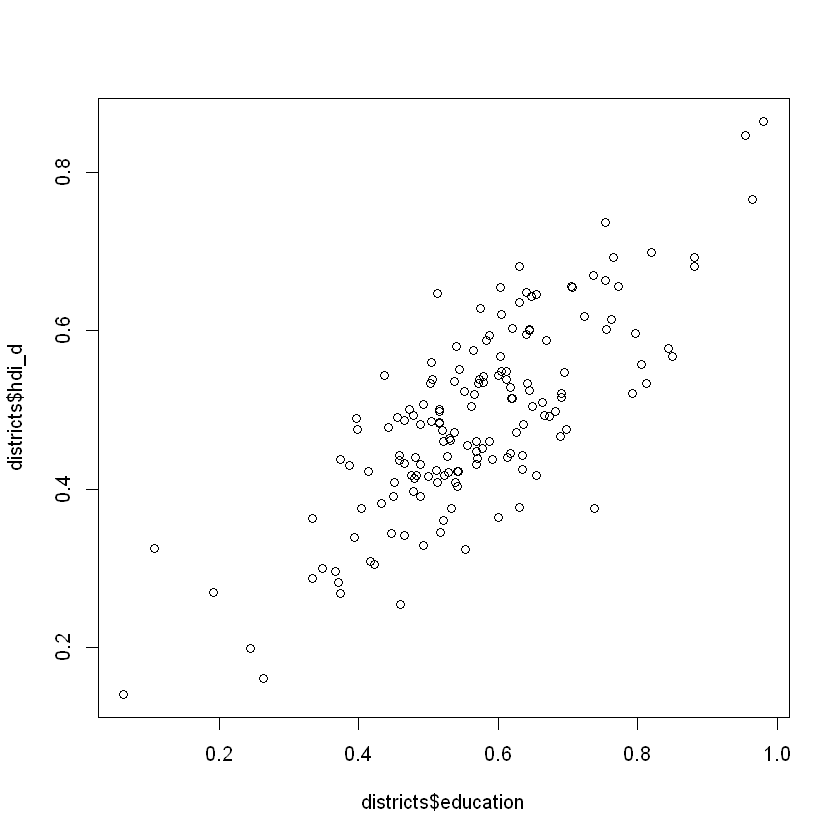

In [5]:
plot(x=districts$education, y=districts$hdi_d)

We can now regress education over human development. We assume that they are independent for now and test homoskedasticity after regression.

In [100]:
hdi.educ.lm <- lm(hdi_d ~ education, data=districts)
summary(hdi.educ.lm)
hdi.educ.lm$coefficients


Call:
lm(formula = hdi_d ~ education, data = districts)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.223299 -0.051537 -0.001153  0.058905  0.192811 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.12334    0.02402   5.134  8.2e-07 ***
education    0.64493    0.04100  15.730  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07531 on 159 degrees of freedom
Multiple R-squared:  0.6088,	Adjusted R-squared:  0.6063 
F-statistic: 247.4 on 1 and 159 DF,  p-value: < 2.2e-16


(Intercept)   education 
  0.1233375   0.6449343

Looking at the results, **education** is a meaningful variable to explain **hdi_d** (p-value is less than 0.01). Also, it explains around 60% percent of the variation (look at Adjusted R-squared). Now, we should check homoskedasticity.

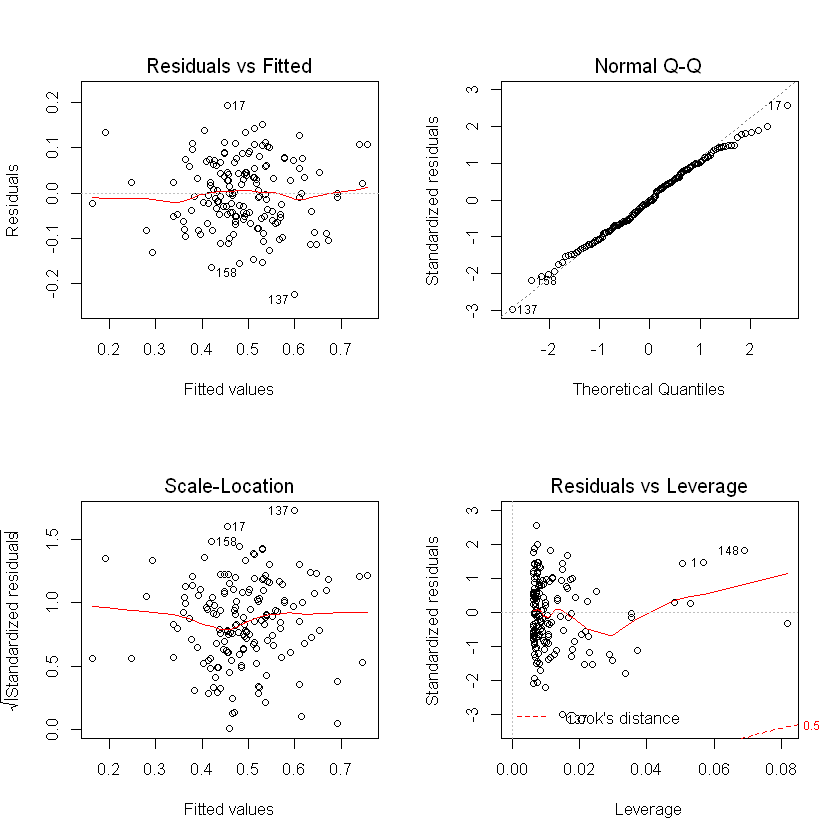

In [101]:
par(mfrow=c(2,2))
plot(hdi.educ.lm)
par(mfrow=c(1,1))

We use the first graph to check for homoskedasticity. Red line show the means of residuals. Since they are around zero mostly, this means there are no outliers or biases in the data that would make a linear regression invalid. Let's graph regression line with 

`geom_smooth()` using formula 'y ~ x'


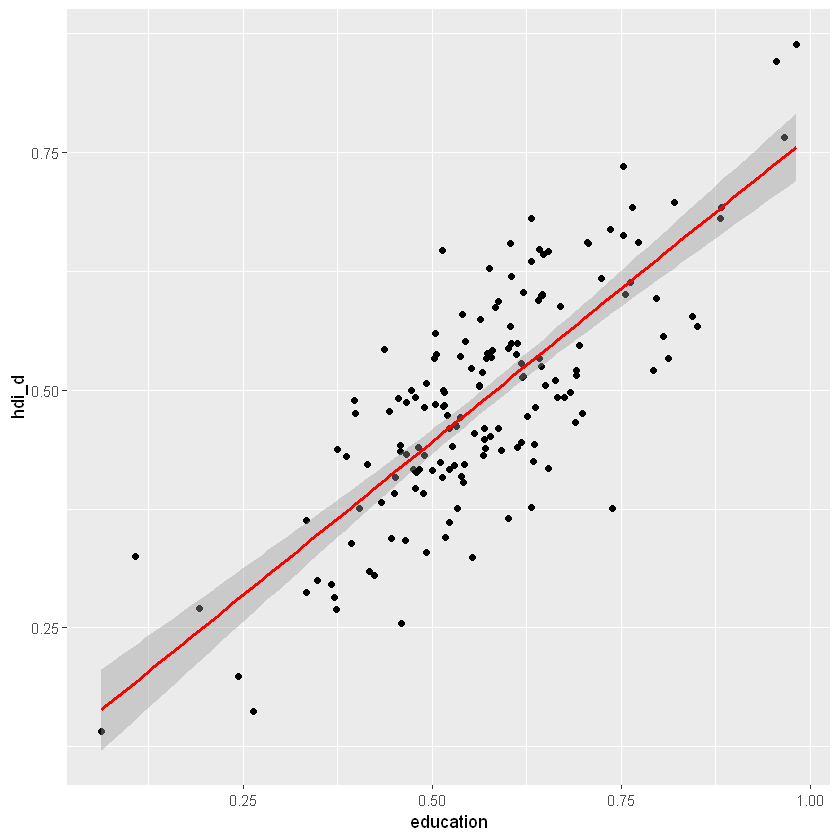

In [102]:
hdi.graph<-ggplot(districts, aes(x=education, y=hdi_d))+
                geom_point()+
                geom_smooth(method="lm", col="red")
hdi.graph

## Multiple Regression: College Acceptance, Applications, and Elite Colleges

Let's read the college data provided in GitHub page.

In [40]:
college <- read.csv("College.csv", header = T, stringsAsFactors=FALSE, sep=",")
head(college)

X,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


As you can see, college names are shown as variables. Let's change it.

In [41]:
rownames(college)=college[,1] 
college=college[,-1]
sum <- summary(college)
sum

   Private               Apps           Accept          Enroll    
 Length:777         Min.   :   81   Min.   :   72   Min.   :  35  
 Class :character   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242  
 Mode  :character   Median : 1558   Median : 1110   Median : 434  
                    Mean   : 3002   Mean   : 2019   Mean   : 780  
                    3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902  
                    Max.   :48094   Max.   :26330   Max.   :6392  
   Top10perc       Top25perc      F.Undergrad     P.Undergrad     
 Min.   : 1.00   Min.   :  9.0   Min.   :  139   Min.   :    1.0  
 1st Qu.:15.00   1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0  
 Median :23.00   Median : 54.0   Median : 1707   Median :  353.0  
 Mean   :27.56   Mean   : 55.8   Mean   : 3700   Mean   :  855.3  
 3rd Qu.:35.00   3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0  
 Max.   :96.00   Max.   :100.0   Max.   :31643   Max.   :21836.0  
    Outstate       Room.Board       Books           Personal  

We will use **Top10perc**, percentage of accepted students that are ranked in top 10 percent in their high schools, and **Apps**, the number of applications. Let's check if they are independent.

In [109]:
cor(college$Top10perc, college$Apps)

[1] 0.3388337

Not satisfactory, but we will use it for now Let's plot independent variables.

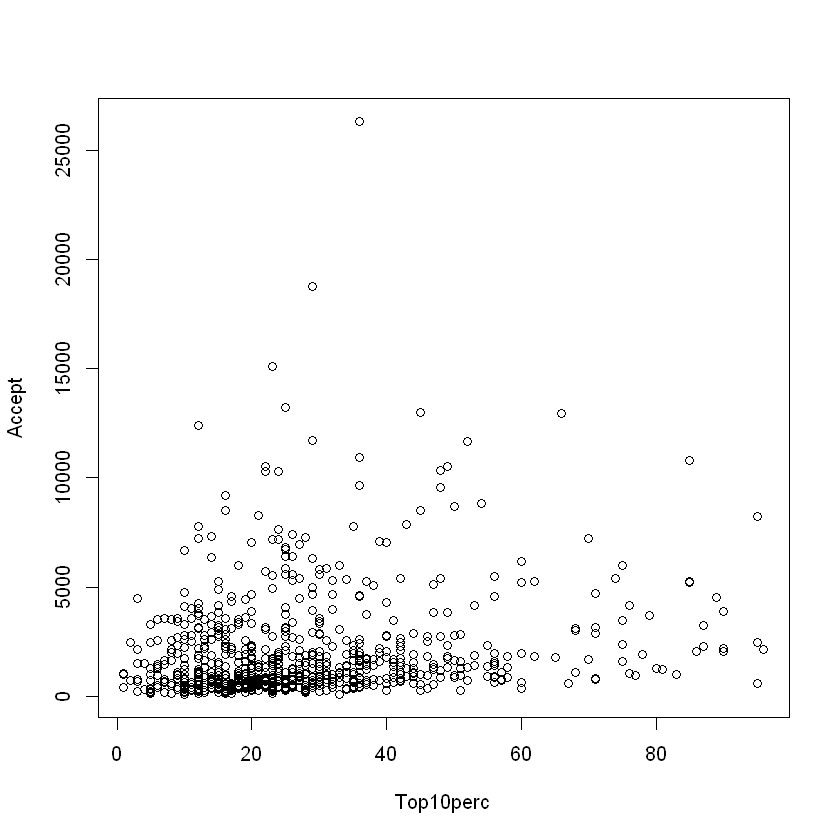

In [108]:
plot(Accept~Top10perc, data=college)
plot(Accept~Apps, data=college)

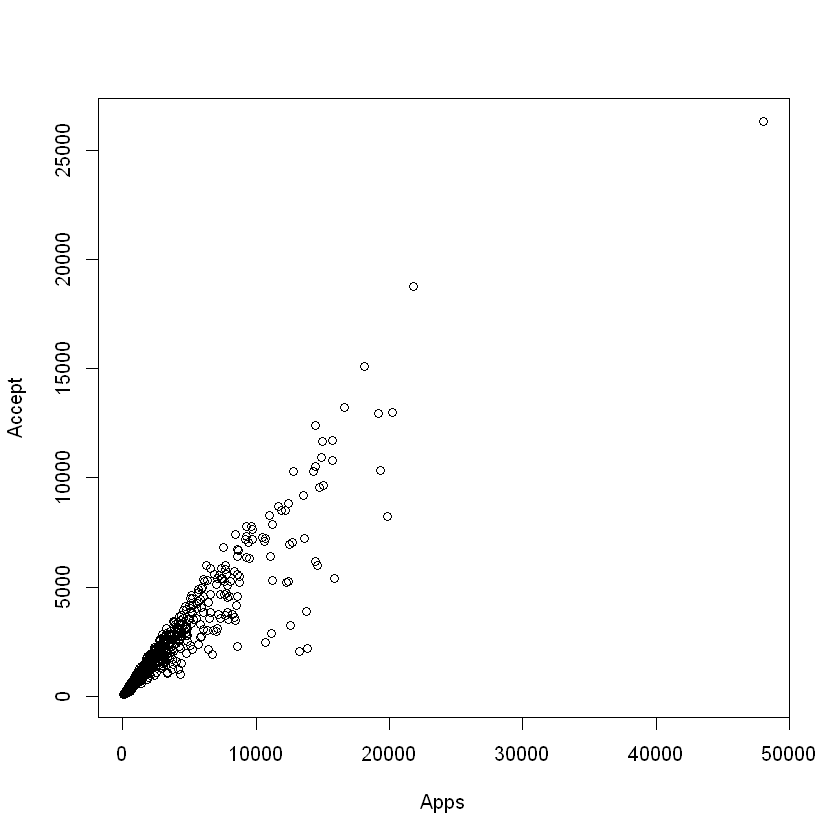

Let's create a new variable to use for later visualization.

In [82]:
Elite=rep(0,nrow(college))
Elite[college$Top10perc >50]=1
Elite=as.factor(Elite)
college=data.frame(college ,Elite)
summary(college$Elite)

No Yes 
699  78

Now, regression time.

In [87]:
accept.lm <- lm(Accept ~ Apps + Top10perc, data = college) 
summary(accept.lm)


Call:
lm(formula = Accept ~ Apps + Top10perc, data = college)

Residuals:
    Min      1Q  Median      3Q     Max 
-5432.9  -282.1   -42.3   293.6  4939.4 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 683.064981  49.945374   13.68   <2e-16 ***
Apps          0.628358   0.007324   85.80   <2e-16 ***
Top10perc   -19.970739   1.606759  -12.43   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 742.9 on 774 degrees of freedom
Multiple R-squared:  0.9084,	Adjusted R-squared:  0.9081 
F-statistic:  3837 on 2 and 774 DF,  p-value: < 2.2e-16


Let's plot regression line and use **Elite** variable to show differences between colleges.

`geom_smooth()` using formula 'y ~ x'


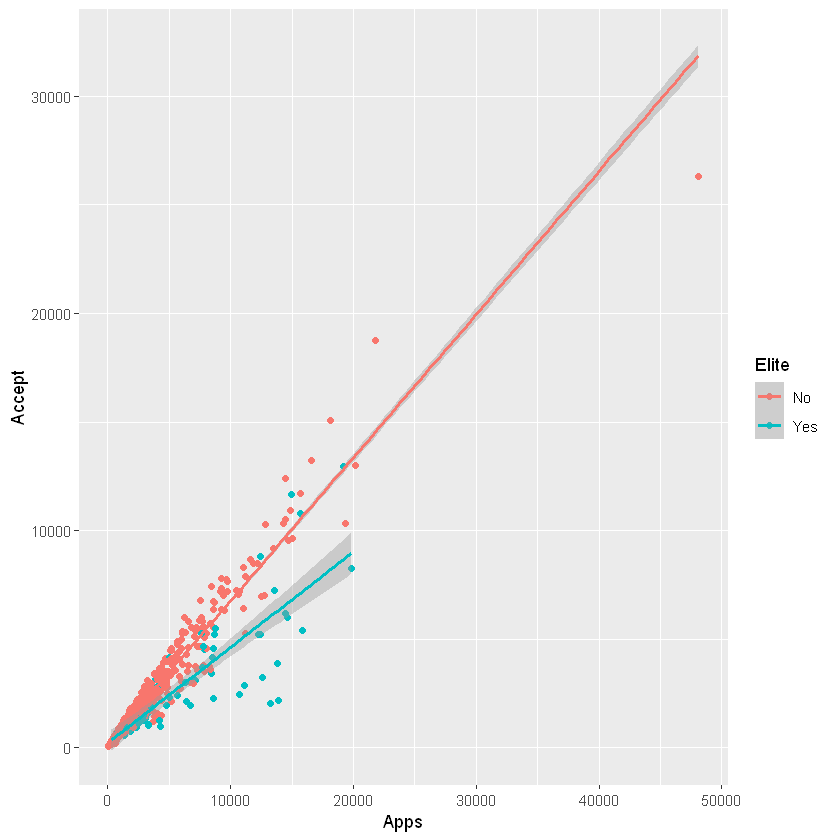

In [97]:
accept.plot <- ggplot(college, aes(x=Apps, y=Accept, color=Elite)) +
  geom_point()+
geom_smooth(method="lm")
accept.plot

We should check residuals for normality.

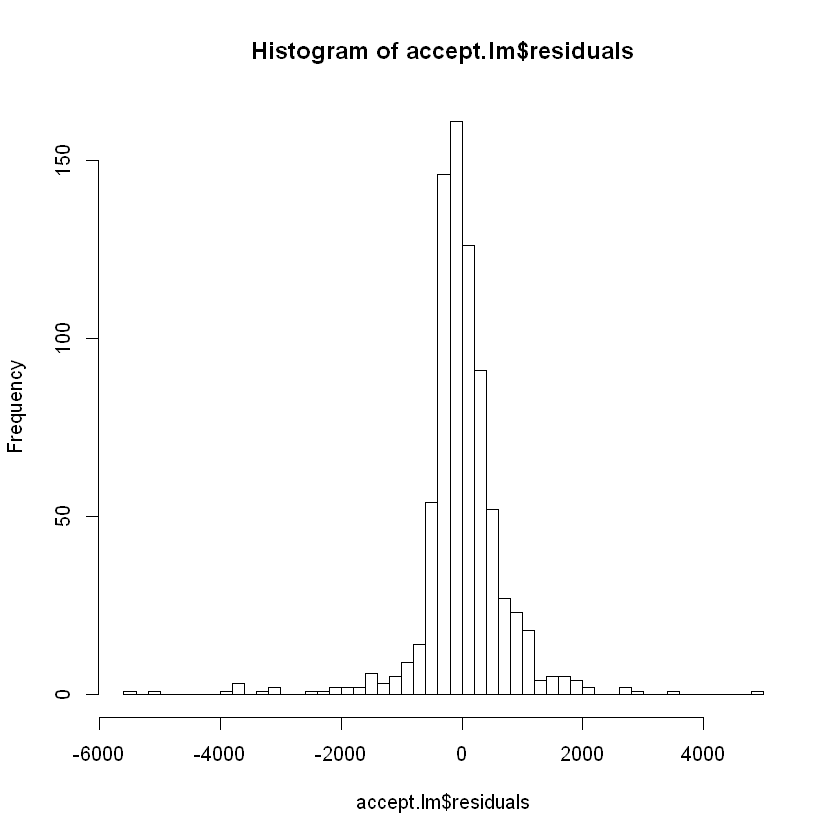

In [113]:
hist(accept.lm$residuals, breaks=50)